PHASE 0 - IMPORT DATASET

In [80]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans

In [81]:
# read the dataset
data = pd.read_csv('dataset.csv',nrows=100000)

PHASE 1 - PREPROCESSING

In [82]:
# delete unecessary columns. These data are not helpful to our research
data.drop('ID', axis=1, inplace=True)
data.drop("Description", axis=1, inplace=True)
data.drop("Number", axis=1, inplace=True)
data.drop("Zipcode", axis=1, inplace=True)
data.drop("Country", axis=1, inplace=True)
data.drop("Airport_Code", axis=1, inplace=True)
data.drop("Weather_Timestamp", axis=1, inplace=True)
data.drop("Pressure(in)", axis=1, inplace=True)
data.drop("Wind_Direction", axis=1, inplace=True)
data.drop("Wind_Speed(mph)", axis=1, inplace=True)
data.drop("Precipitation(in)", axis=1, inplace=True)
data.drop("Amenity", axis=1, inplace=True)
data.drop("Bump", axis=1, inplace=True)
data.drop("Crossing", axis=1, inplace=True)
data.drop("Give_Way", axis=1, inplace=True)
data.drop("Junction", axis=1, inplace=True)
data.drop("No_Exit", axis=1, inplace=True)
data.drop("Railway", axis=1, inplace=True)
data.drop("Roundabout", axis=1, inplace=True)
data.drop("Station", axis=1, inplace=True)
data.drop("Stop", axis=1, inplace=True)
data.drop("Traffic_Calming", axis=1, inplace=True)
data.drop("Traffic_Signal", axis=1, inplace=True)
data.drop("Turning_Loop", axis=1, inplace=True)
data.drop("Start_Time", axis=1, inplace=True)
data.drop("End_Time", axis=1, inplace=True)
data.drop("Start_Lat", axis=1, inplace=True)
data.drop("Start_Lng", axis=1, inplace=True)
data.drop("End_Lat", axis=1, inplace=True)
data.drop("End_Lng", axis=1, inplace=True)
data.drop("Wind_Chill(F)", axis=1, inplace=True)
data.drop("Street", axis=1, inplace=True)
data.drop("City", axis=1, inplace=True)
data.drop("County", axis=1, inplace=True)

In [83]:
# Delete missing values
# remove every row that has at least one missing value (NaN)
data.dropna(axis=0,inplace=True)

In [84]:
# Delete duplicate rows
data.drop_duplicates(inplace = True)

In [85]:
# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [86]:
# select the last 4 columns from the dataset, so as to combine them in one column
last_4_columns  = data.iloc[: , -4:]

# convert each record of these columns. Night == 0 and Day == 1
last_4_columns["Sunrise_Sunset"] = np.where(last_4_columns["Sunrise_Sunset"] == "Night", 0, 1)
last_4_columns["Civil_Twilight"] = np.where(last_4_columns["Civil_Twilight"] == "Night", 0, 1)
last_4_columns["Nautical_Twilight"] = np.where(last_4_columns["Nautical_Twilight"] == "Night", 0, 1)
last_4_columns["Astronomical_Twilight"] = np.where(last_4_columns["Astronomical_Twilight"] == "Night", 0, 1)

# find the mean of each row of the last_4_columns dataframe
last_4_columns = last_4_columns.mean(axis=1)

# convert the values of the last_4_rows dataframe into 0 and 1, based in a condition
# if the mean of a row is <0,5, then the value of this row will be 0, else it will be 1
for i in range (len(last_4_columns)):
    if last_4_columns[i] < 0.5:
        last_4_columns[i] = 0
    else:
        last_4_columns[i] = 1

In [87]:
# convert R and L of column 'Side' to 0 and 1 respectively. That means that R is 0 and L is 1.
data["Side"] = np.where(data['Side'] == "R", 0, 1)

In [88]:
# delete the last 4 columns of the dataset
# we do not need them, as we can combine them in a new column
data.drop('Sunrise_Sunset', axis=1, inplace=True)
data.drop('Civil_Twilight', axis=1, inplace=True)
data.drop('Nautical_Twilight', axis=1, inplace=True)
data.drop('Astronomical_Twilight', axis=1, inplace=True)

In [89]:
# add a new column to the dataset.
# this new column will be the "last_4_columns" dataframe that we calculated earlier
data.insert(9,"Day_Night",last_4_columns)

In [90]:
# Converting 'Day_Night' column from float to int
data = data.astype({"Day_Night": int})

In [91]:
# round all the values of "Temperature(F)" column
data["Temperature(F)"] = data["Temperature(F)"].round(0)

In [92]:
# print dataset
data.head()

,Severity,Distance(mi),Side,State,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Day_Night
0,3,3.230,0,OH,US/Eastern,42.0,58.0,10.0,Light Rain,0
1,2,0.747,0,OH,US/Eastern,37.0,91.0,10.0,Light Rain,0
2,2,0.055,0,OH,US/Eastern,36.0,97.0,10.0,Overcast,0
3,2,0.123,0,OH,US/Eastern,39.0,55.0,10.0,Overcast,1
4,3,0.500,0,OH,US/Eastern,37.0,93.0,10.0,Light Rain,1


In [93]:
# delete outliers from the dataset using the IQR method.
# We will focus only in columns: Temperature(F), Distance(mi), Visibility(mi) and Humidity(%)
for x in ["Temperature(F)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Distance(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Humidity(%)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

#---------------------------------------------------------------#

for x in ["Visibility(mi)"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr) - 5 # In order to keep values other than 10 (Ex. 5.5,6,7,8,9,10)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [94]:
# Delete rows that contain nulls (outliers)
data.dropna(axis=0,inplace=True)

In [95]:
# reindex the dataframe after deletion of rows
data.reset_index(drop=True, inplace=True)

In [96]:
# Discretization of the column "Weather_Condition"

# we have separated all unique weather conditions of the dataset into four lists (very_bad_weahter, bad_weather,medium_weather and perfect_weather).
# This separation has been done according to our opinion.

very_bad_weather = ['Tornado','Smoke','Snow Grains','Shallow Fog','Thunderstorm','Light Thunderstorms and Rain','Thunder','Thunder in the Vicinity','Thunderstorms and Rain',
'Heavy Rain','Fog','Blowing Snow','Mist','T-Storm','T-Storm / Windy','Volcanic Ash','Heavy Thunderstorms and Rain','Thunder / Windy','Heavy T-Storm / Windy','Heavy T-Storm',
'Heavy Drizzle','Sand / Dust Whirlwinds','Blowing Snow Nearby','Heavy Rain / Windy','Sand / Dust Whirls Nearby']

bad_weather = ['Patches of Fog','Haze','Light Snow','Squalls','Light Ice Pellets','Widespread Dust','Blowing Dust / Windy',
'Light Snow / Windy','Light Snow Showers','Wintry Mix','Light Rain with Thunder', 'Haze / Windy','Dust Whirls','Light Snow and Sleet','Snow',
'Light Snow and Sleet / Windy','Light Sleet','Patches of Fog / Windy','Low Drifting Snow','Squalls / Windy','Wintry Mix / Windy','Sleet']

medium_weather = ['Light Rain','Overcast','Mostly Cloudy', 'Cloudy','Scattered Clouds','Drizzle','Light Drizzle','Light Freezing Drizzle','Rain','Fair / Windy','Light Freezing Rain','Cloudy / Windy','Partly Cloudy / Windy',
'Light Rain Showers','Light Rain / Windy','Mostly Cloudy / Windy','Blowing Dust','Funnel Cloud','Light Rain Shower','Smoke / Windy','Light Rain Shower / Windy','Rain Shower','Sand / Dust Whirlwinds / Windy','Rain Showers',
'Light Drizzle / Windy','Showers in the Vicinity','Widespread Dust / Windy','Light Freezing Rain / Windy''N/A Precipitation','Rain / Windy',
'Light Sleet / Windy','Hail','Drizzle / Windy','Light Haze']

perfect_weather = ['Clear','Fair','Partly Cloudy','Small Hail']

# change the values of the column "Weather_Condition" column
# Now, column "Weather_Condition" has only records: "Bad","Medium" and "Perfect"
for i in range(len(data["Weather_Condition"])):
    if data["Weather_Condition"][i] in bad_weather:
        data.at[i,"Weather_Condition"] = 2
    elif data["Weather_Condition"][i] in medium_weather:
        data.at[i,"Weather_Condition"] = 3  
    elif data["Weather_Condition"][i] in very_bad_weather:
         data.at[i,"Weather_Condition"] = 1
    else:
        data.at[i,"Weather_Condition"] = 4 # perfect weather

In [97]:
# Convert data type of column 'Weather_Condition' to int
data = data.astype({"Weather_Condition": int})

In [98]:
# Convert 'State' column of the dataframe into numbers ()
 
# instance of label Encoder
le = LabelEncoder()
 
# encode column 'State' and return encoded label
label = le.fit_transform(data['State'])

# insert new column to the dataset
data.insert(4,"State_Number",label)

In [99]:
# print dataset
data.head()

,Severity,Distance(mi),Side,State,State_Number,Timezone,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Day_Night
0,2,0.747,0,OH,33,US/Eastern,37.0,91.0,10.0,3,0
1,2,0.055,0,OH,33,US/Eastern,36.0,97.0,10.0,3,0
2,2,0.123,0,OH,33,US/Eastern,39.0,55.0,10.0,3,1
3,3,0.500,0,OH,33,US/Eastern,37.0,93.0,10.0,3,1
4,2,1.427,0,OH,33,US/Eastern,36.0,100.0,10.0,3,1


PHASE 2 - DATA VISUALIZATION

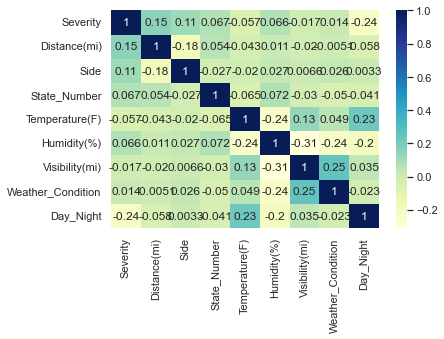

In [100]:
# show the correlation of data using Heatmap
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Based in the plot above, we can conclude that ...

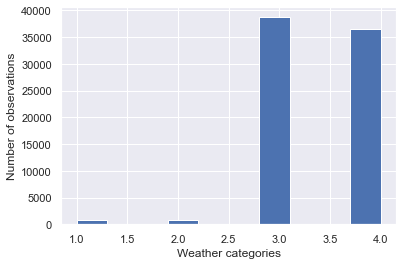

In [101]:
# Visualize 'Weather_Condition' column using histogram
plt.hist(data["Weather_Condition"])
plt.xlabel('Weather categories')
plt.ylabel('Number of observations')
plt.show()

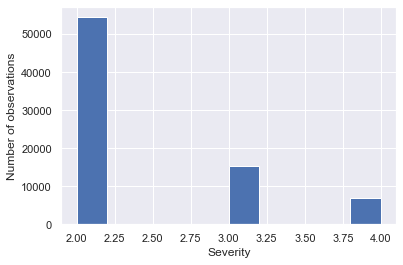

In [102]:
# Visualize 'Severity' column of using histogram
plt.hist(data["Severity"])
plt.xlabel('Severity')
plt.ylabel('Number of observations')
plt.show()

In [103]:
# print States, in which the majority of accidents has happened
n_accidents_per_state = data['State'].value_counts().head(10).rename_axis('State').reset_index(name='Counts')
n_accidents_per_state

,State,Counts
0,CA,9600
1,TX,8546
2,FL,8545
3,IL,6260
4,NY,5059
5,NC,4082
6,NJ,3008
7,MO,2650
8,GA,2647
9,MI,2564


The state with the majority of accidents is: CA

PHASE 3 - DATA CLUSTERING

In [104]:
############################################################
# CLUSTER DATASET BASED ON Severity AND Weather Condition  #
############################################################

C1 = data[['Severity', 'Weather_Condition']].copy()

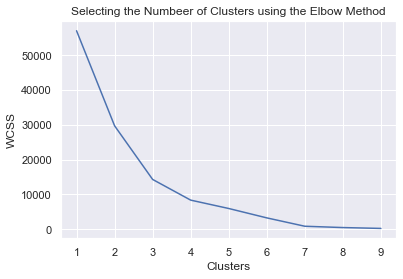

In [105]:
# elbow method to find out the optimum K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(C1)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

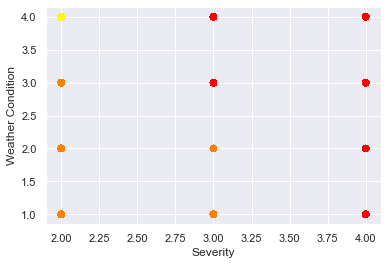

In [106]:
# K-means implementation and visualization of the effect
kmeans = KMeans(n_clusters=3)
Y1 = kmeans.fit_predict(C1)

plt.scatter(C1['Severity'], C1['Weather_Condition'],c=Y1,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('Weather Condition')
plt.show()

In [107]:
############################################################
# CLUSTER DATASET BASED ON Weather_Condition AND Distance  #
############################################################

C2 = data[['Weather_Condition', 'Distance(mi)']].copy()

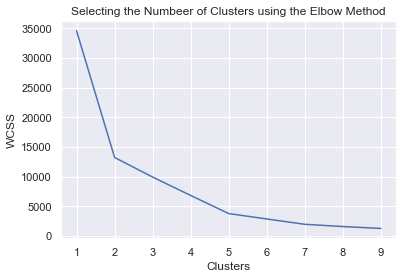

In [108]:
# use elbow method to find out optimum K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C2)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

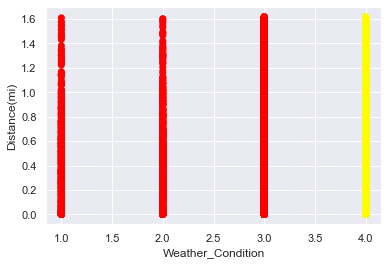

In [109]:
# make the classification and visualize the output
kmeans = KMeans(n_clusters=2)
Y2 = kmeans.fit_predict(C2)

plt.scatter(C2['Weather_Condition'], C2['Distance(mi)'],c=Y2,cmap='autumn')
plt.xlabel('Weather_Condition')
plt.ylabel('Distance(mi)')
plt.show()

In [110]:
############################################################
# CLUSTER DATASET BASED ON Severity AND State              #
############################################################

C3 = data[['Severity', 'State_Number']].copy()

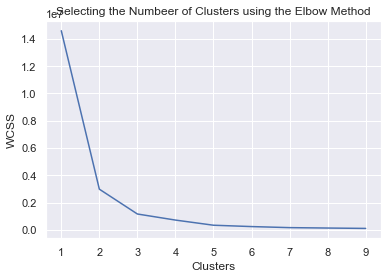

In [111]:
# use Elbow method to find out optimum K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C3)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

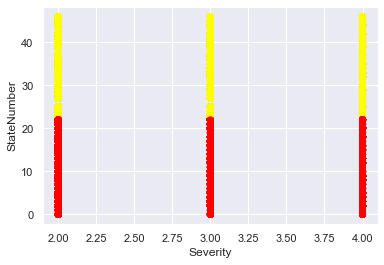

In [112]:
# make classification and visualization of the output
kmeans = KMeans(n_clusters=2)
Y3 = kmeans.fit_predict(C3)

plt.scatter(C3['Severity'], C3['State_Number'],c=Y3,cmap="autumn")
plt.xlabel('Severity')
plt.ylabel('StateNumber')
plt.show()

In [113]:
############################################################
# CLUSTER DATASET BASED ON Day_Night AND Visibility(mi)    #
############################################################

C4 = data[['Day_Night', 'Visibility(mi)']].copy()

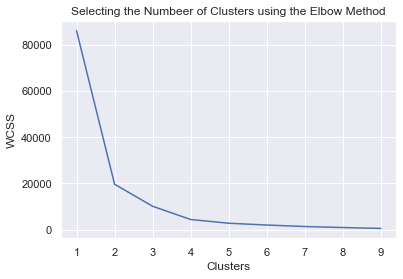

In [114]:
# use Elbow method to find the optimum K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C4)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

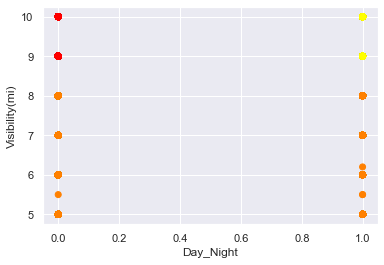

In [115]:
# make classification and visualization
kmeans = KMeans(n_clusters=3)
Y4 = kmeans.fit_predict(C4)

plt.scatter(C4['Day_Night'], C4['Visibility(mi)'],c=Y4,cmap="autumn")
plt.xlabel('Day_Night')
plt.ylabel('Visibility(mi)')
plt.show()

In [116]:
############################################################
# CLUSTER DATASET BASED ON Side and Severity               #
############################################################

#  we will run an algorithm (Elbow Method) in order to find the optimum K for our dataset
C5 = data[['Side', 'Severity']].copy()

C:\Users\strat\AppData\Local\Temp\ipykernel_8872\3681182610.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(C5)
C:\Users\strat\AppData\Local\Temp\ipykernel_8872\3681182610.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(C5)
C:\Users\strat\AppData\Local\Temp\ipykernel_8872\3681182610.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(C5)


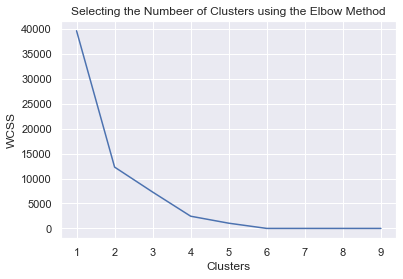

In [117]:
# use Elbow method to find out optimum K
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(C5)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 10), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum K is:

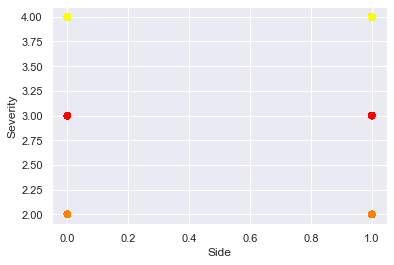

In [118]:
# make classification and visualize the outcome
kmeans = KMeans(n_clusters=3)
Y5 = kmeans.fit_predict(C5)

plt.scatter(C5['Side'], C5['Severity'],c=Y5,cmap="autumn")
plt.xlabel('Side')
plt.ylabel('Severity')
plt.show()

PHASE 4 - DATA CLASSIFICATION

In [119]:
# Features: Weather_Condition, Visibility(mi), Day_Night
# Labels: Severity

# X is the <Features> matrix
X = data[['Weather_Condition', 'Visibility(mi)','Day_Night']].copy()
y = data['Severity'].copy()

In [120]:
# Split dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [121]:
# Normalize the X_train and X_test, in order for them to be between [-1,1]  
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
# print X_train set
X_train

array([[ 0.97070624,  0.30869105,  0.44296257],
       [-0.78437908,  0.30869105,  0.44296257],
       [-0.78437908,  0.30869105, -2.25752709],
       ...,
       [-0.78437908,  0.30869105,  0.44296257],
       [ 0.97070624,  0.30869105,  0.44296257],
       [-0.78437908,  0.30869105,  0.44296257]])

In [123]:
# print X_test set
X_test

array([[ 0.97070624,  0.30869105, -2.25752709],
       [-0.78437908,  0.30869105,  0.44296257],
       [-0.78437908,  0.30869105,  0.44296257],
       ...,
       [ 0.97070624,  0.30869105,  0.44296257],
       [-0.78437908, -4.72204082,  0.44296257],
       [-0.78437908,  0.30869105, -2.25752709]])

First classifying method - Gaussian Classifier

In [124]:
# Use Bayes classifier in order to classify our Features and Labels
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predict the test results
y_pred1  =  classifier.predict(X_test)

In [125]:
# Calculate the Confusion Matrix - Bayes Classifier
cm1 = confusion_matrix(y_test, y_pred1)

# Calculate accurancy score - Bayes Classifier
ac1 = accuracy_score(y_test,y_pred1)

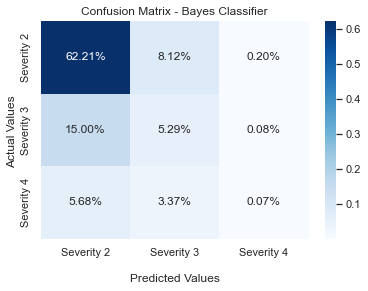

In [126]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Bayes Classifier')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [127]:
# Print accurancy score of Bayes Classifier
ac1

0.6756492872485843

Second classifying method - Decision Tree Classifier

In [128]:
# Initialize classifier
dtc = DecisionTreeClassifier()

# fit classifier
dtc.fit(X_train, y_train)

# make the classification process
y_pred2 = dtc.predict(X_test)

In [129]:
# calculate accurancy - Decision Tree Classifier
ac2 = metrics.accuracy_score(y_test, y_pred2)

# calculate confusion matrix - Decision Tree Classifier
cm2 = confusion_matrix(y_test, y_pred2)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (4).

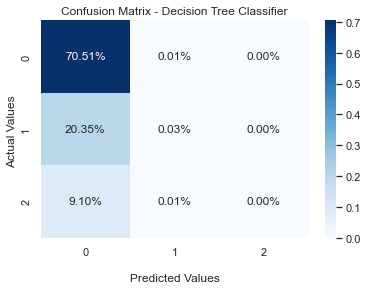

In [130]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Decision Tree Classifier')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Print accurancy score of Decision Tree Classifier
ac2

0.8455233291298865

Third classifying method - Random Forest

In [ ]:
# initialize random forest classifier
clf=RandomForestClassifier(n_estimators=100)

# train the model
clf.fit(X_train,y_train)

y_pred3=clf.predict(X_test)

In [ ]:
# calculate accurancy - Random Forest Classifier
ac3 = metrics.accuracy_score(y_test, y_pred3)

# calculate confusion matrix - Random Forest Classifier
cm3 = confusion_matrix(y_test, y_pred3)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (4).

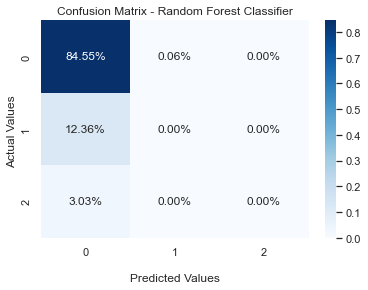

In [ ]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm3/np.sum(cm3), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Print accurancy score of Random Forest Classifier
ac3

0.8448928121059268

PHASE 4 - MAKE A DATA STORY USING KERAS

In [ ]:
# print X_train set
X_train

array([[ 0.86204316,  0.2923109 ,  0.30723235],
       [ 0.86204316,  0.2923109 ,  0.30723235],
       [ 0.86204316,  0.2923109 ,  0.30723235],
       ...,
       [-1.05152972,  0.2923109 ,  0.30723235],
       [ 0.86204316,  0.2923109 ,  0.30723235],
       [-1.05152972,  0.2923109 ,  0.30723235]])

In [ ]:
# One - Hot encding the output varriable (label)
y_train = pd.get_dummies(y_train)
y_train = np.array(y_train)

y_test = pd.get_dummies(y_test)
y_test = np.array(y_test)

In [ ]:
# print y_train set
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
# print y_test set
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
#################################
# define the first keras model  #
#################################

# make a sequential newral network with 3 inputs and 3 outputs
model1 = Sequential()
model1.add(Dense(6, input_dim = 3, activation = 'relu')) # Rectified Linear Unit Activation Function
model1.add(Dense(12, activation='relu'))
model1.add(Dense(4, activation='softmax')) # Softmax for multi-class classification

In [ ]:
# compile the first model
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# train the first model
model1.fit(X_train, y_train,epochs=30, batch_size=1000, verbose=1)

Epoch 1/30
64/64 [==============================] - 4s 8ms/step - loss: 1.0442 - accuracy: 0.4778
Epoch 2/30
64/64 [==============================] - 0s 7ms/step - loss: 0.7769 - accuracy: 0.8617
Epoch 3/30
64/64 [==============================] - 0s 7ms/step - loss: 0.5792 - accuracy: 0.8617
Epoch 4/30
64/64 [==============================] - 1s 8ms/step - loss: 0.5019 - accuracy: 0.8617
Epoch 5/30
64/64 [==============================] - 1s 8ms/step - loss: 0.4743 - accuracy: 0.8617
Epoch 6/30
64/64 [==============================] - 1s 8ms/step - loss: 0.4609 - accuracy: 0.8617
Epoch 7/30
64/64 [==============================] - 0s 7ms/step - loss: 0.4549 - accuracy: 0.8617
Epoch 8/30
64/64 [==============================] - 1s 8ms/step - loss: 0.4525 - accuracy: 0.8617
Epoch 9/30
64/64 [==============================] - 0s 7ms/step - loss: 0.4514 - accuracy: 0.8617
Epoch 10/30
64/64 [==============================] - 0s 7ms/step - loss: 0.4509 - accuracy: 0.8617
Epoch 11/30
64/64 [

In [ ]:
# now test the X_test set
predicted_y1 = model1.predict(X_test)

50/50 [==============================] - 1s 4ms/step


In [ ]:
# evaluate the model
score = model1.evaluate(X_test,y_test,verbose=0)
print('Loss score is: ',score[0], 'and accuracy score is:',score[1])

Loss score is:  0.48890307545661926 and accuracy score is: 0.8461538553237915


In [ ]:
# calculate confusion matrix - Model 1
cm4 = confusion_matrix(y_test.argmax(axis=1), predicted_y1.argmax(axis=1))

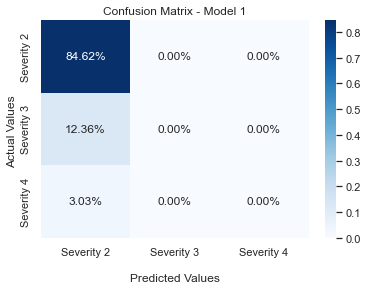

In [ ]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm4/np.sum(cm4), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Model 1')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
##################################
# define the second keras model  #
##################################

# make a sequential newral network with 3 inputs and 3 outputs
model2 = Sequential()
model2.add(Dense(6, input_dim = 3, activation = 'relu')) # Rectified Linear Unit Activation Function
model2.add(Dense(12, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(4, activation='softmax')) # Softmax for multi-class classification

In [ ]:
# compile the second model
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# train the first model
model2.fit(X_train, y_train,epochs=30, batch_size=1000, verbose=1)

Epoch 1/30
635/635 [==============================] - 6s 5ms/step - loss: 0.5224 - accuracy: 0.8507
Epoch 2/30
635/635 [==============================] - 3s 5ms/step - loss: 0.4536 - accuracy: 0.8617
Epoch 3/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4517 - accuracy: 0.8617
Epoch 4/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4516 - accuracy: 0.8617
Epoch 5/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4502 - accuracy: 0.8617
Epoch 6/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4514 - accuracy: 0.8617
Epoch 7/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4508 - accuracy: 0.8617
Epoch 8/30
635/635 [==============================] - 3s 5ms/step - loss: 0.4509 - accuracy: 0.8617
Epoch 9/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4509 - accuracy: 0.8617
Epoch 10/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4513 - accuracy: 0.8617

In [ ]:
# now test the X_test set
predicted_y2 = model2.predict(X_test)

50/50 [==============================] - 0s 4ms/step


In [ ]:
# calculate confusion matrix - Model 2
cm5 = confusion_matrix(y_test.argmax(axis=1), predicted_y2.argmax(axis=1))

In [ ]:
# evaluate the model 2
score = model2.evaluate(X_test,y_test,verbose=0)
print('Loss score is: ',score[0], 'and accuracy score is:',score[1])

Loss score is:  0.48991653323173523 and accuracy score is: 0.8461538553237915


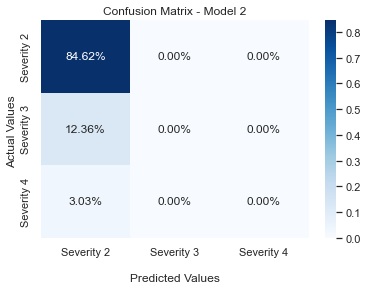

In [ ]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm5/np.sum(cm5), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Model 2')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
##################################
# define the third keras model   #
##################################

# make a sequential newral network with 3 inputs and 3 outputs
model3 = Sequential()
model3.add(Dense(6, input_dim = 3, activation = 'relu')) # Rectified Linear Unit Activation Function
model3.add(Dense(12, activation='relu'))
model3.add(Dense(24, activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(4, activation='softmax')) # Softmax for multi-class classification

In [ ]:
# compile the second model
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# train the first model
model3.fit(X_train, y_train,epochs=30, batch_size=1000, verbose=1)

Epoch 1/30
635/635 [==============================] - 6s 5ms/step - loss: 0.5203 - accuracy: 0.8567
Epoch 2/30
635/635 [==============================] - 3s 5ms/step - loss: 0.4541 - accuracy: 0.8617
Epoch 3/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4530 - accuracy: 0.8617
Epoch 4/30
635/635 [==============================] - 3s 5ms/step - loss: 0.4524 - accuracy: 0.8617
Epoch 5/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4522 - accuracy: 0.8617
Epoch 6/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4522 - accuracy: 0.8617
Epoch 7/30
635/635 [==============================] - 4s 7ms/step - loss: 0.4525 - accuracy: 0.8617
Epoch 8/30
635/635 [==============================] - 4s 7ms/step - loss: 0.4526 - accuracy: 0.8617
Epoch 9/30
635/635 [==============================] - 4s 7ms/step - loss: 0.4517 - accuracy: 0.8617
Epoch 10/30
635/635 [==============================] - 4s 6ms/step - loss: 0.4513 - accuracy: 0.8617

In [ ]:
# now test the X_test set
predicted_y3 = model3.predict(X_test)

50/50 [==============================] - 0s 2ms/step


In [ ]:
# calculate confusion matrix - Model 3
cm6 = confusion_matrix(y_test.argmax(axis=1), predicted_y3.argmax(axis=1))

In [ ]:
# evaluate the model
score = model3.evaluate(X_test,y_test,verbose=0)
print('Loss score is: ',score[0], 'and accuracy score is:',score[1])

Loss score is:  0.4881269633769989 and accuracy score is: 0.8461538553237915


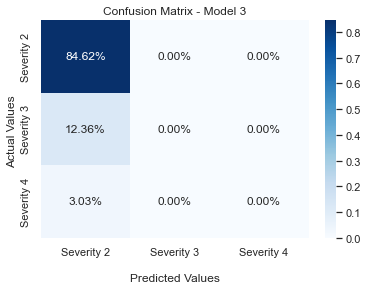

In [ ]:
# Plot confusion matrix using a heatmap
ax = sns.heatmap(cm6/np.sum(cm6), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix - Model 3')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])
ax.yaxis.set_ticklabels(['Severity 1','Severity 2','Severity 3','Severity 4'])

## Display the visualization of the Confusion Matrix.
plt.show()